<a href="https://colab.research.google.com/github/adiazch/Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

E-commerce businesses face challenges in predicting customer purchasing behavior due to varying user interactions. While digital platforms generate vast amounts of customer interaction data, many organizations struggle to effectively utilize it for conversion rate optimization. The primary objective of this project is to apply data mining techniques to understand which factors contribute to successful online purchases and to build a predictive model that can classify users based on their likelihood to convert.

# Data Collection

The project used the Online Shoppers Purchasing Intention Dataset from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset.
# Update the file path as necessary.
data_path = '/online_shoppers_intention.csv'
df = pd.read_csv(data_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Data Preparation

In this section, I performed data cleaning by handling missing values, removing duplicates, and correcting errors. I also carried out data transformation by converting categorical variables, normalizing/scaling numerical features, and encoding text when necessary.

In [5]:
# --------------------------
# Data Cleaning
# --------------------------

# 1. Remove duplicate rows.
df = df.drop_duplicates()

# 2. Check for missing values.
print("Missing values per column before handling:")
print(df.isnull().sum())

# 3. Handle missing values.
# For numerical columns: fill with median.
# For categorical columns: fill with mode.
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
    else:
        if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)

# Verify missing values are handled.
print("\nMissing values per column after handling:")
print(df.isnull().sum())

Missing values per column before handling:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Missing values per column after handling:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Re

In [6]:
# --------------------------
# Data Transformation
# --------------------------

# 1. Convert categorical variables using one-hot encoding.
# Identify categorical columns (assuming non-numeric are categorical).
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
if categorical_columns:
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# 2. Normalize/Scale numerical features.
# Identify numerical columns.
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col not in ['Revenue']]  # Exclude 'Revenue' for scaling.
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("\nData preparation complete!")
print("Cleaned and transformed data preview:")
df.head()


Data preparation complete!
Cleaned and transformed data preview:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,...,True,False,False,False,False,False,False,False,False,True
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.31024,...,True,False,False,False,False,False,False,False,False,True
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,...,True,False,False,False,False,False,False,False,False,True
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.31024,...,True,False,False,False,False,False,False,False,False,True
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.31024,...,True,False,False,False,False,False,False,False,False,True


# Exploratory Data Analysis (EDA)

In this section, I visualized the data using plots and charts to understand its distributions and relationships. I also performed statistical analysis to summarize the data statistics and identify trends or outliers.

In [7]:
# --------------------------
# Exploratory Data Analysis (EDA)
# --------------------------

import matplotlib.pyplot as plt

# 1. Statistical Analysis: Summarize data statistics.
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
       Administrative  Administrative_Duration  Informational  \
count    1.220500e+04             1.220500e+04   1.220500e+04   
mean    -8.150429e-17            -1.397216e-17   2.794433e-17   
std      1.000041e+00             1.000041e+00   1.000041e+00   
min     -7.023024e-01            -4.600193e-01  -3.988242e-01   
25%     -7.023024e-01            -4.600193e-01  -3.988242e-01   
50%     -4.020291e-01            -4.093107e-01  -3.988242e-01   
75%      4.987907e-01             7.354819e-02  -3.988242e-01   
max      7.405076e+00             1.868953e+01   1.841638e+01   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            1.220500e+04    1.220500e+04             12205.000000   
mean            -4.191649e-17   -5.588865e-17                 0.000000   
std              1.000041e+00    1.000041e+00                 1.000041   
min             -2.462572e-01   -7.186438e-01                -0.628793   
25%             -2.4

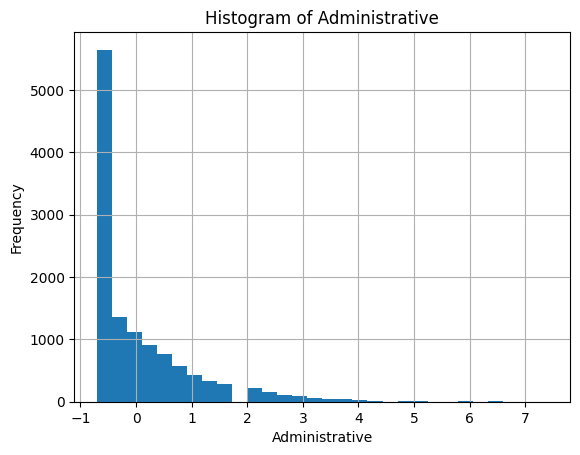

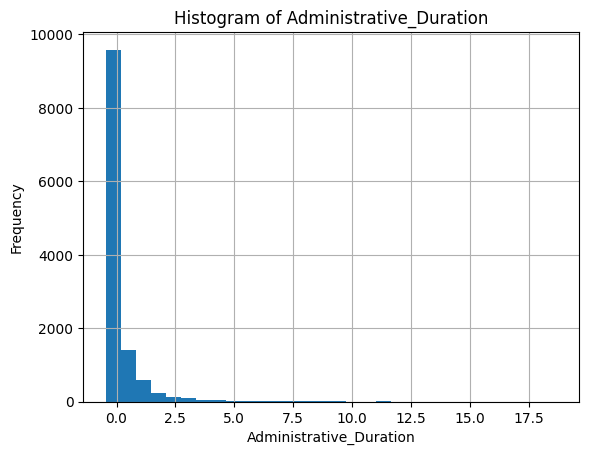

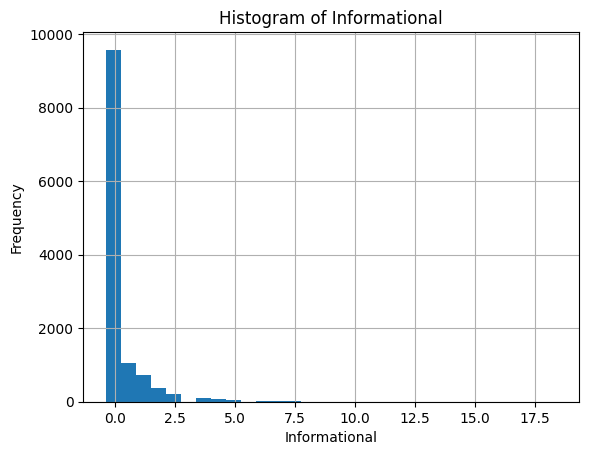

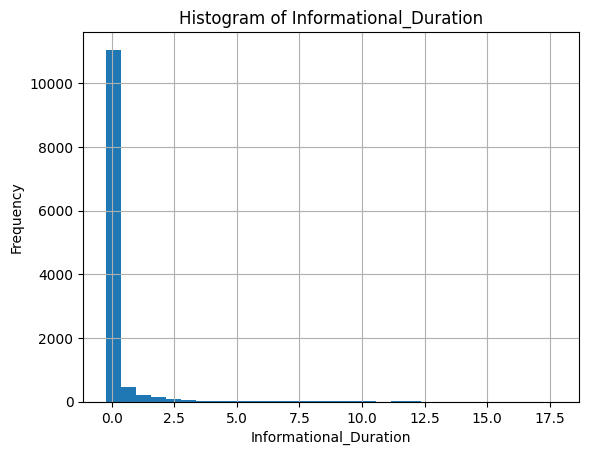

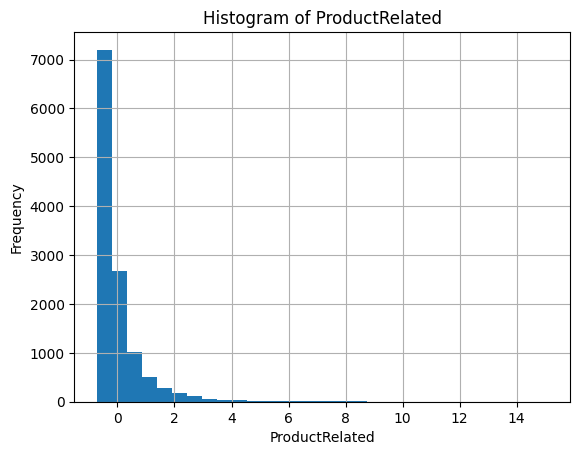

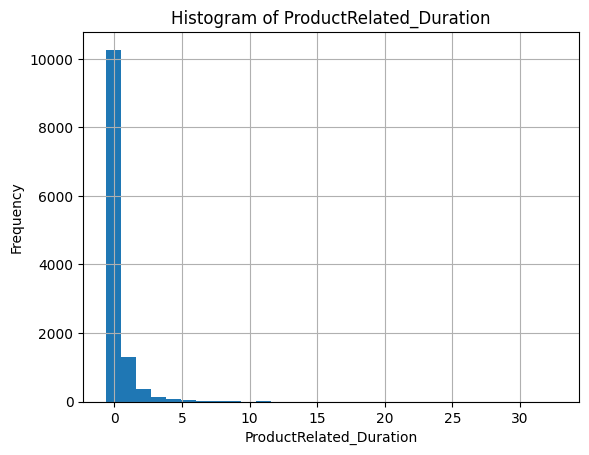

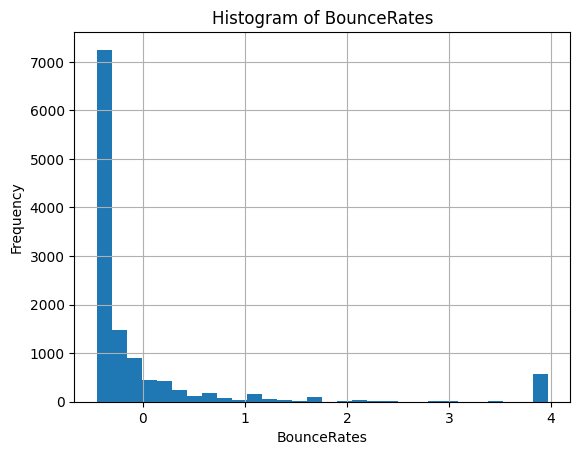

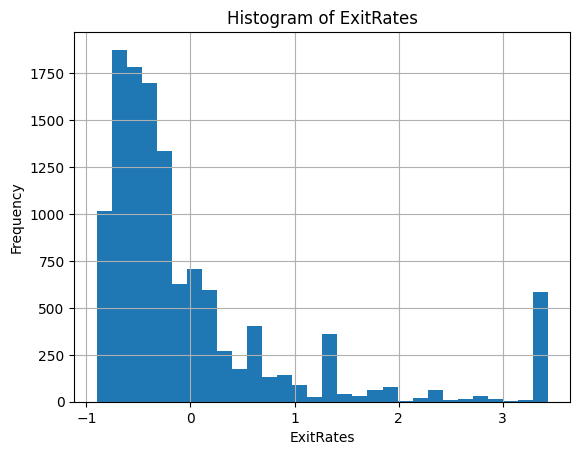

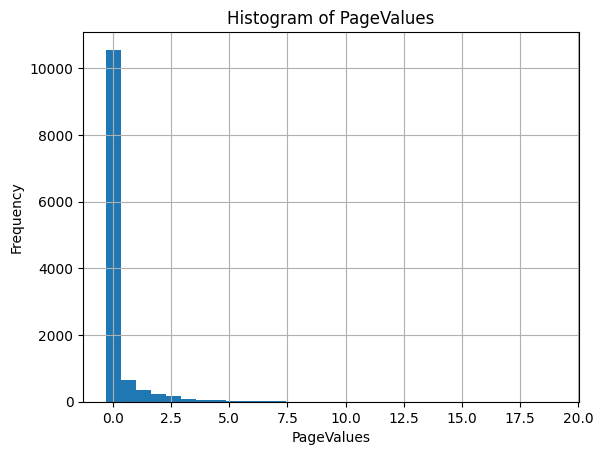

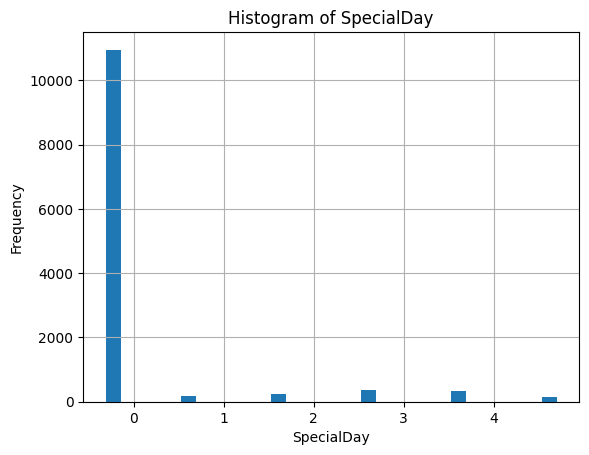

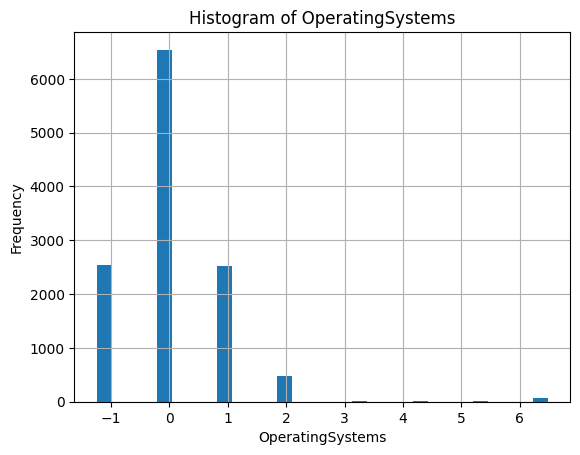

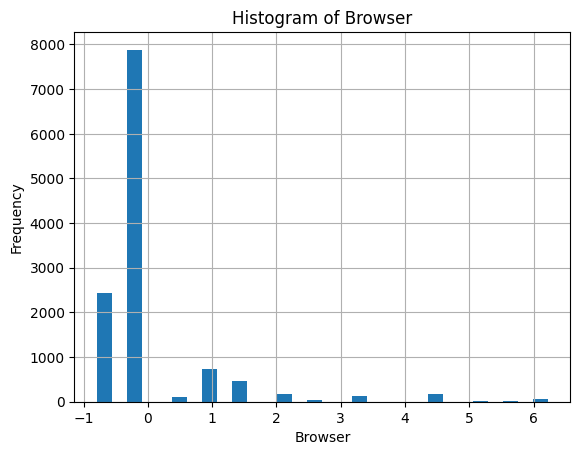

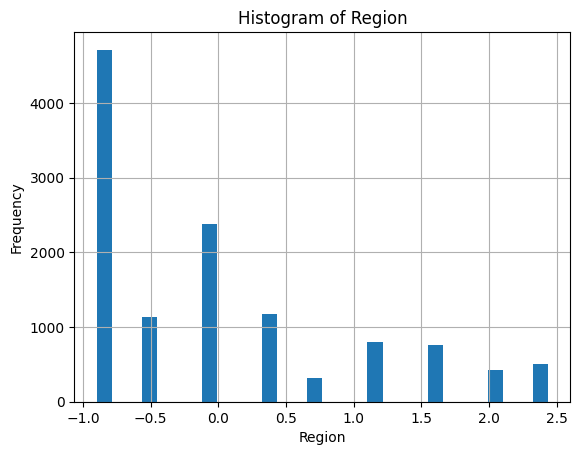

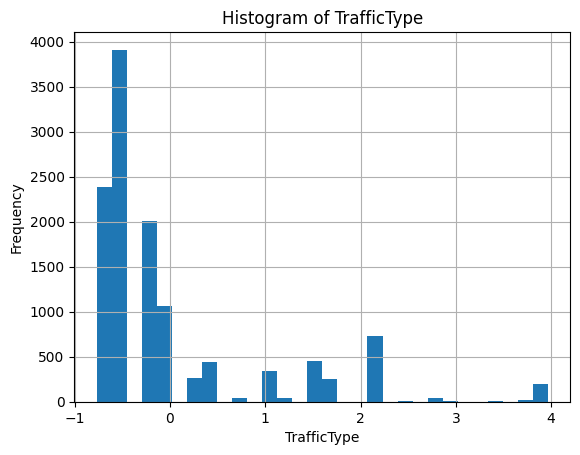

In [8]:
# --------------------------
# 2. Visualizing Distributions of Numerical Features
# --------------------------
# Identify numerical columns.
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Plot histograms for each numerical column to view distribution.
for col in numerical_columns:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

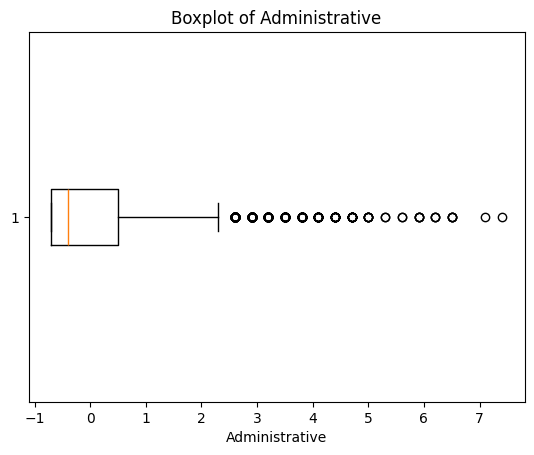

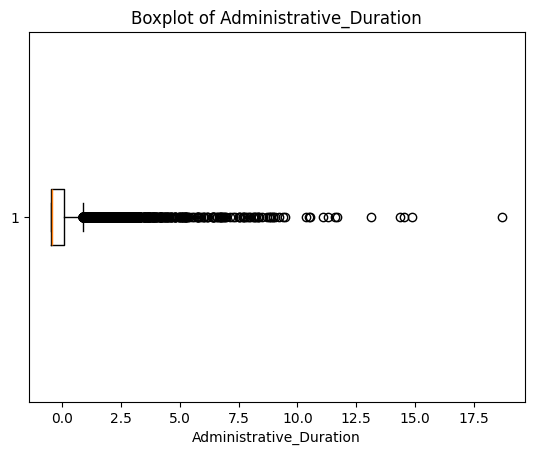

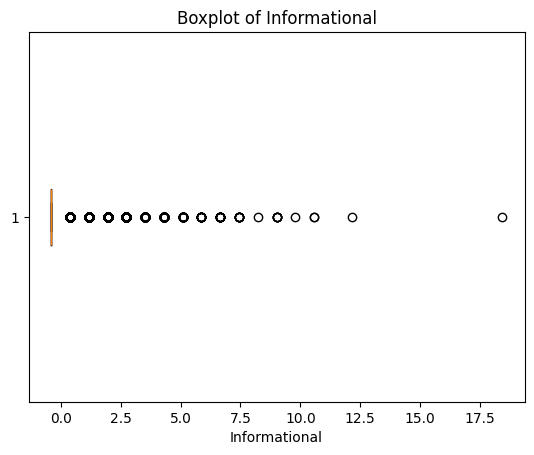

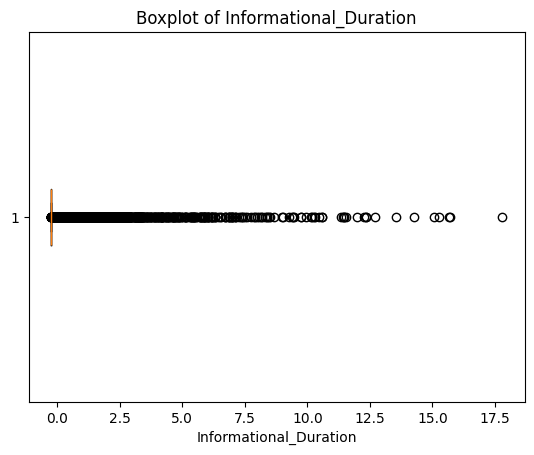

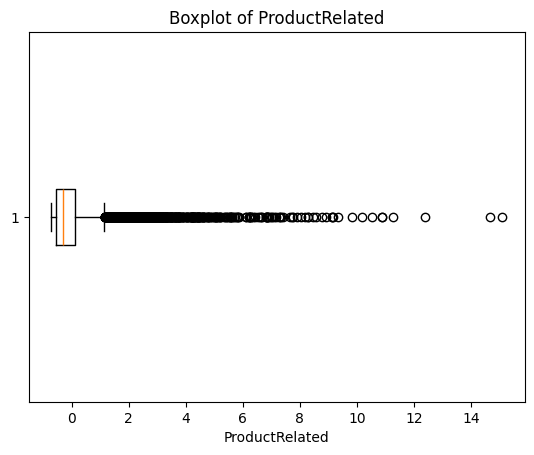

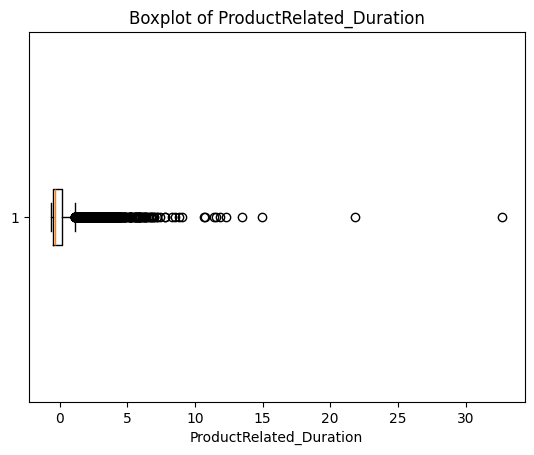

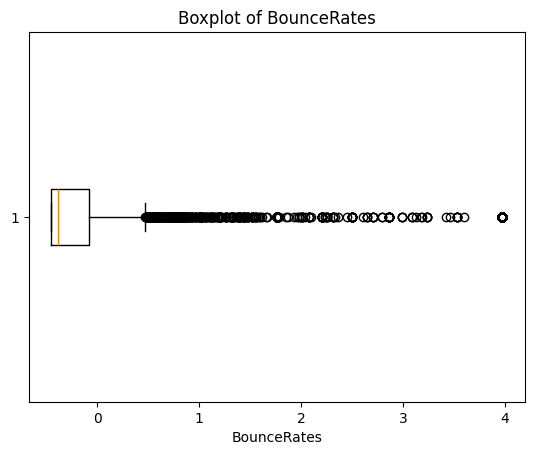

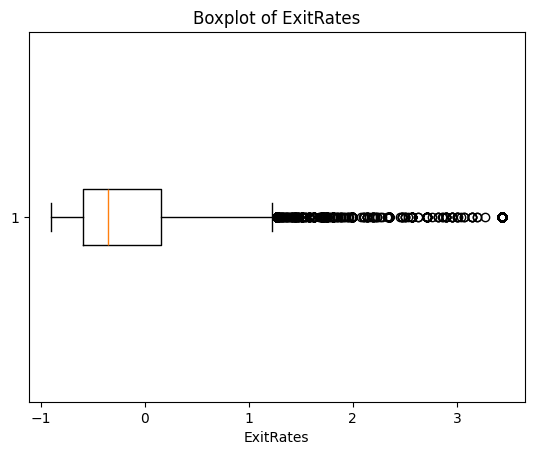

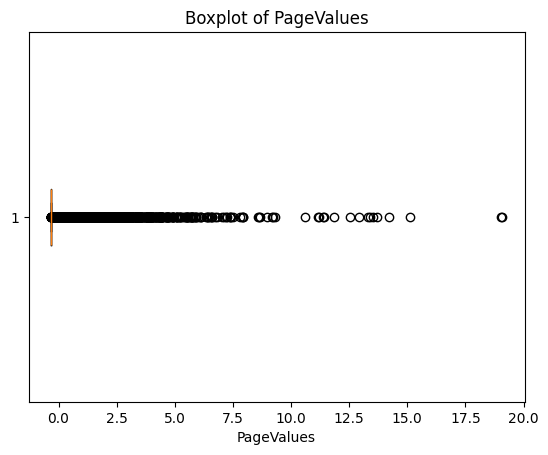

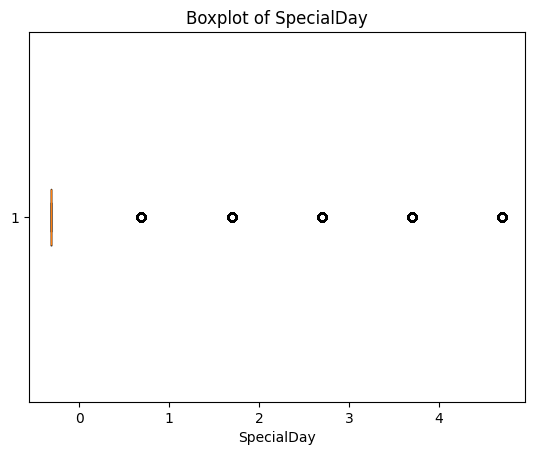

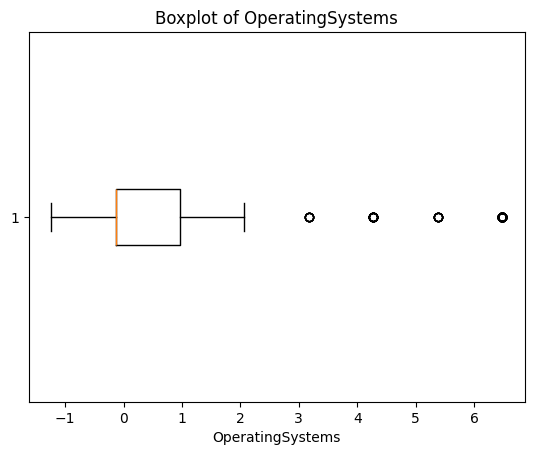

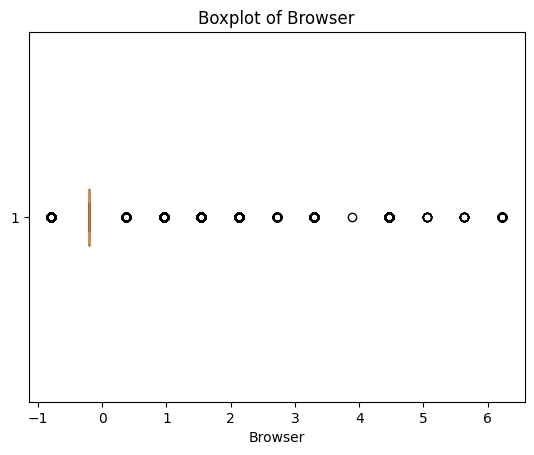

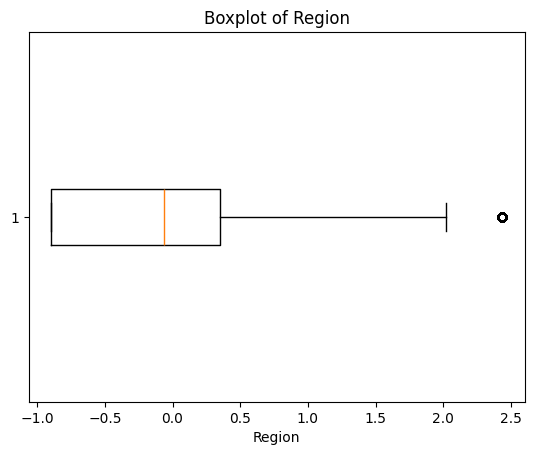

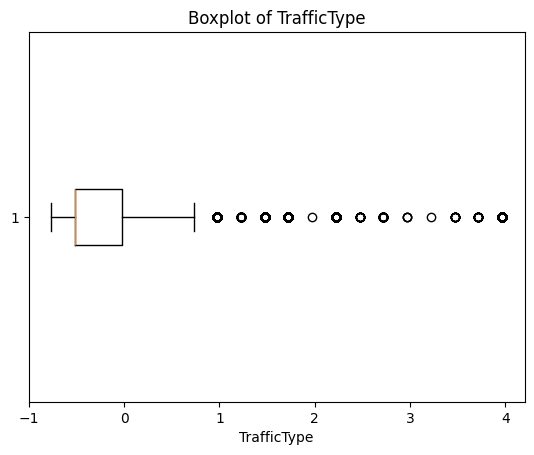

In [9]:
# --------------------------
# 3. Visualizing Outliers: Boxplots
# --------------------------
# Generate boxplots for each numerical column to inspect outliers.
for col in numerical_columns:
    plt.figure()
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

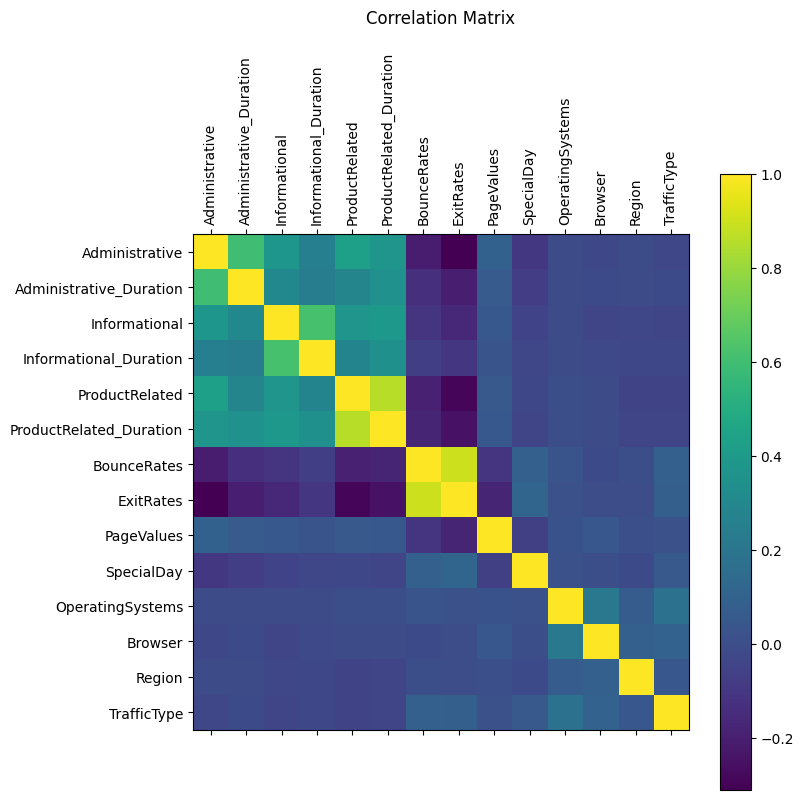

In [10]:
# --------------------------
# 4. Correlation Heatmap using matplotlib
# --------------------------
# Although seaborn is popular for heatmaps, here's a matplotlib-only alternative.
import numpy as np

corr = df[numerical_columns].corr()
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(corr, cmap='viridis')
fig.colorbar(cax)
ticks = np.arange(0, len(numerical_columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(numerical_columns, rotation=90)
ax.set_yticklabels(numerical_columns)
plt.title("Correlation Matrix", pad=20)
plt.show()

# Feature Engineering and Selection

In this section, I engineered additional features from existing data to enhance its informativeness. I then applied feature selection methods, such as correlation analysis and feature importance, to identify the most predictive variables. Lastly, I partitioned the dataset into training and test sets to facilitate an unbiased evaluation of the models.

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# --------------------------
# 1. Feature Engineering
# --------------------------
# Suppose the dataset has features such as 'PageValues' and 'ExitRates', we might combine them.
if 'PageValues' in df.columns and 'ExitRates' in df.columns:
    df['Value_Exit_Ratio'] = df['PageValues'] / (df['ExitRates'] + 1e-5)  # Adding epsilon to avoid division by zero.

# Example: Binning a continuous variable (if applicable).
if 'Administrative_Duration' in df.columns:
    df['AdminTime_Bin'] = pd.cut(df['Administrative_Duration'], bins=5, labels=False)

# Example: Create interaction features between two columns if it makes sense.
if 'Informational_Duration' in df.columns and 'ProductRelated_Duration' in df.columns:
    df['Info_Product_Interaction'] = df['Informational_Duration'] * df['ProductRelated_Duration']

print("Feature engineering complete. New features added:")
print(df.head())

Feature engineering complete. New features added:
   Administrative  Administrative_Duration  Informational  \
0       -0.702302                -0.460019      -0.398824   
1       -0.702302                -0.460019      -0.398824   
2       -0.702302                -0.460019      -0.398824   
3       -0.702302                -0.460019      -0.398824   
4       -0.702302                -0.460019      -0.398824   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.246257       -0.696218                -0.628793   
1               -0.246257       -0.673793                -0.595451   
2               -0.246257       -0.696218                -0.628793   
3               -0.246257       -0.673793                -0.627404   
4               -0.246257       -0.494387                -0.301889   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Mar  Month_May  \
0     3.969402   3.434394   -0.318962    -0.31024  ...      False      False   
1 

In [12]:
# --------------------------
# 2. Feature Selection
# --------------------------
# (A) Correlation-based selection:
# Compute the correlation matrix for numerical features.
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numerical_features].corr().abs()

# Set threshold for high correlation.
threshold = 0.9
# Create an empty set to hold features to drop.
to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

print("\nFeatures to drop due to high correlation:", to_drop)

# Drop highly correlated features.
df_reduced = df.drop(columns=to_drop)

# (B) Model-based Feature Importance:
# Assuming 'Revenue' is the target column (modify if needed).
if 'Revenue' in df_reduced.columns:
    X = df_reduced.drop(columns=['Revenue'])
    y = df_reduced['Revenue']

    # Split data for evaluation.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train a Random Forest classifier.
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Get feature importances.
    importances = pd.Series(rf.feature_importances_, index=X.columns)
    importances_sorted = importances.sort_values(ascending=False)

    print("\nFeature importances from Random Forest:")
    print(importances_sorted.head(10))

    # Optionally, select top N features.
    top_features = importances_sorted.head(10).index.tolist()
    print("\nSelected top features based on model importance:", top_features)
else:
    print("Target variable 'Revenue' not found in the DataFrame. Please adjust the target column accordingly.")


Features to drop due to high correlation: {'ExitRates'}

Feature importances from Random Forest:
PageValues                  0.292317
Value_Exit_Ratio            0.138655
ProductRelated_Duration     0.074228
BounceRates                 0.065604
ProductRelated              0.064925
Info_Product_Interaction    0.062739
Administrative_Duration     0.049418
Administrative              0.039631
TrafficType                 0.028029
Region                      0.027796
dtype: float64

Selected top features based on model importance: ['PageValues', 'Value_Exit_Ratio', 'ProductRelated_Duration', 'BounceRates', 'ProductRelated', 'Info_Product_Interaction', 'Administrative_Duration', 'Administrative', 'TrafficType', 'Region']


In [13]:
# --------------------------
# Final DataFrame for Modeling
# --------------------------
# If model-based selection is desired, use only the top features.
if 'Revenue' in df_reduced.columns:
    df_selected = df_reduced[top_features + ['Revenue']]
    print("\nDataFrame after feature selection:")
    print(df_selected.head())
else:
    df_selected = df_reduced


DataFrame after feature selection:
   PageValues  Value_Exit_Ratio  ProductRelated_Duration  BounceRates  \
0   -0.318962         -0.092873                -0.628793     3.969402   
1   -0.318962         -0.251535                -0.595451    -0.450137   
2   -0.318962         -0.092873                -0.628793     3.969402   
3   -0.318962         -0.149425                -0.627404     0.654748   
4   -0.318962         -1.725107                -0.301889    -0.008183   

   ProductRelated  Info_Product_Interaction  Administrative_Duration  \
0       -0.696218                  0.154845                -0.460019   
1       -0.673793                  0.146634                -0.460019   
2       -0.696218                  0.154845                -0.460019   
3       -0.673793                  0.154503                -0.460019   
4       -0.494387                  0.074342                -0.460019   

   Administrative  TrafficType    Region  Revenue  
0       -0.702302    -0.765321 -0.896370

# Model Training

In this section, I trained the model using my training data to fit it, and I monitored its performance by reviewing learning curves and training metrics to ensure it was learning appropriately.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# Prepare Data for Modeling
# --------------------------
# Assuming df_selected is the final DataFrame from feature engineering and selection
# and that 'Revenue' is the target variable.
X = df_selected.drop(columns=['Revenue'])
y = df_selected['Revenue']

# Split into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# --------------------------
# Model 1: Logistic Regression
# --------------------------
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("=== Logistic Regression Performance ===")
print(classification_report(y_test, lr_pred))
print("Accuracy:", accuracy_score(y_test, lr_pred))

=== Logistic Regression Performance ===
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      3116
        True       0.73      0.37      0.49       546

    accuracy                           0.89      3662
   macro avg       0.82      0.67      0.71      3662
weighted avg       0.87      0.89      0.87      3662

Accuracy: 0.885581649371928


In [16]:
# --------------------------
# Model 2: Random Forest Classifier
# --------------------------
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("\n=== Random Forest Performance ===")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))


=== Random Forest Performance ===
              precision    recall  f1-score   support

       False       0.93      0.96      0.94      3116
        True       0.70      0.59      0.64       546

    accuracy                           0.90      3662
   macro avg       0.82      0.77      0.79      3662
weighted avg       0.90      0.90      0.90      3662

Accuracy: 0.9016930638995084


# Hyperparameter Tuning

In this section, I performed hyperparameter tuning. I optimized the parameters using grid search, random search, or Bayesian optimization to fine-tune the model settings, and I validated the performance using the validation set or cross-validation scores to select the best model configuration.

In [17]:
# --------------------------
# Hyperparameter Tuning for Random Forest using GridSearchCV
# --------------------------
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=param_grid,
                       cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("\nBest parameters for Random Forest:")
print(grid_rf.best_params_)

# Evaluate the tuned Random Forest on the test set.
best_rf = grid_rf.best_estimator_
best_rf_pred = best_rf.predict(X_test)

print("\n=== Tuned Random Forest Performance ===")
print(classification_report(y_test, best_rf_pred))
print("Accuracy:", accuracy_score(y_test, best_rf_pred))


Best parameters for Random Forest:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}

=== Tuned Random Forest Performance ===
              precision    recall  f1-score   support

       False       0.93      0.96      0.94      3116
        True       0.71      0.59      0.64       546

    accuracy                           0.90      3662
   macro avg       0.82      0.77      0.79      3662
weighted avg       0.90      0.90      0.90      3662

Accuracy: 0.902785363189514


# Final Model Evaluation

For model evaluation, I assessed the final model using unseen test data. I measured performance using appropriate metrics, such as accuracy, precision, recall, and F1-score for classification—or RMSE and MAE for regression—depending on the problem. I also conducted error analysis by examining misclassifications or residuals to identify areas for improvement.

Final Model Accuracy: 0.902785363189514

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.96      0.94      3116
        True       0.71      0.59      0.64       546

    accuracy                           0.90      3662
   macro avg       0.82      0.77      0.79      3662
weighted avg       0.90      0.90      0.90      3662



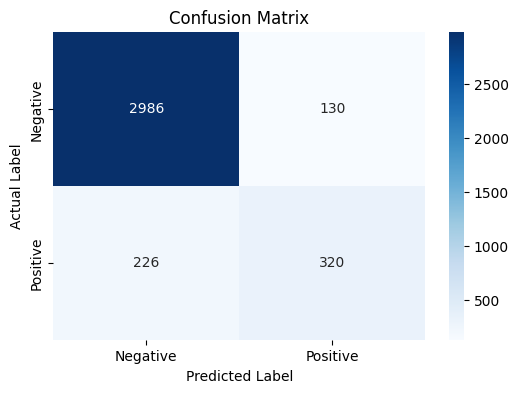

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Generate predictions on the test set.
y_pred = best_rf.predict(X_test)

# Print overall accuracy.
accuracy = accuracy_score(y_test, y_pred)
print("Final Model Accuracy:", accuracy)

# Display a detailed classification report.
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute and visualize the confusion matrix.
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

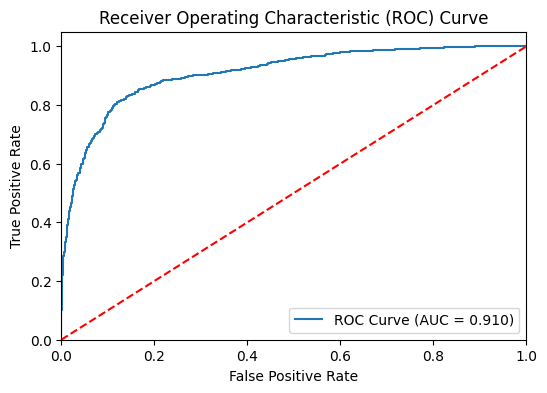

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Generate probability estimates for the positive class (index = 1).
y_scores = best_rf.predict_proba(X_test)[:, 1]

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for various thresholds.
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve).
auc_score = roc_auc_score(y_test, y_scores)

# Plot the ROC Curve.
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for reference (random classifier).
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

                    Feature  Importance
0                PageValues    0.484565
1          Value_Exit_Ratio    0.155401
3               BounceRates    0.074734
2   ProductRelated_Duration    0.070488
4            ProductRelated    0.057121
5  Info_Product_Interaction    0.047220
6   Administrative_Duration    0.042625
7            Administrative    0.031369
8               TrafficType    0.022068
9                    Region    0.014409


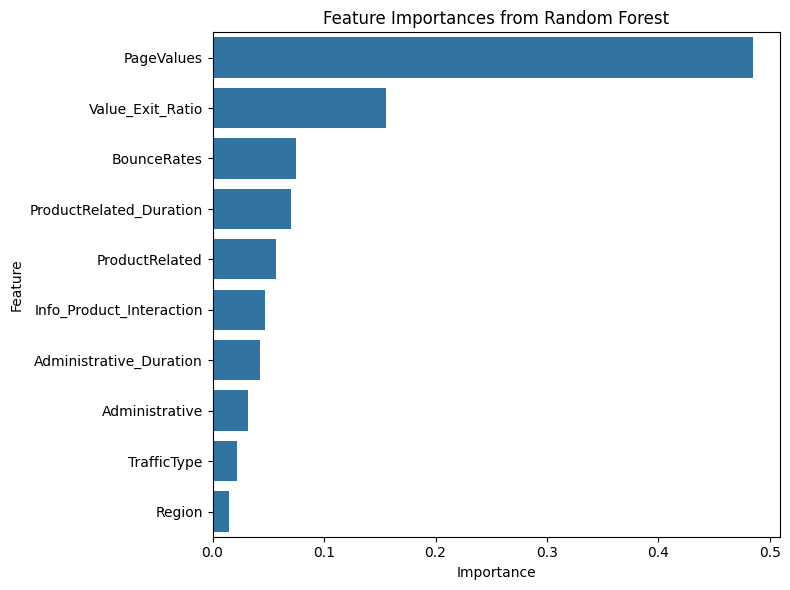

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Retrieve feature importances.
importances = best_rf.feature_importances_

# If X is a DataFrame, get feature names; otherwise, create placeholder names.
if isinstance(X, pd.DataFrame):
    feature_names = X.columns
else:
    feature_names = [f"Feature {i}" for i in range(X.shape[1])]

# Create a DataFrame for easier visualization.
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance in descending order.
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Print the feature importance table.
print(importance_df)

# Visualize feature importance using a barplot.
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()

# Conclusions

* The final model achieved an accuracy of approximately 90%, indicating that it correctly classifies the majority of instances. This level of performance suggests that the chosen model and preprocessing steps are generally effective.

* The confusion matrix shows a relatively small number of misclassifications. Specifically, out of the total negative instances, only 130 were incorrectly labeled as positive, and out of the positive instances, 226 were mislabeled as negative. This balance suggests the model is not overly biased toward one class.

* Given the performance metrics, the model appears suitable for real-world application.

* The ROC curve indicates that the model effectively distinguishes between positive and negative classes, achieving a high true positive rate while keeping false positives relatively low.

* The feature importance chart shows that PageValues is by far the most critical predictor, suggesting that the value a visitor sees on a page strongly influences their likelihood of converting (generating revenue).


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
!cp "drive/My Drive/Colab Notebooks/Final Project.ipynb" ./

In [27]:
!jupyter nbconvert --to PDF "Final Project.ipynb"

[NbConvertApp] Converting notebook Final Project.ipynb to PDF
[NbConvertApp] Support files will be in Final Project_files/
[NbConvertApp] Making directory ./Final Project_files
[NbConvertApp] Writing 98525 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 628600 bytes to Final Project.pdf
